#  Clase 03 de Noviembre 2021 parte 1

#### En esta clase veremos:

1. Pequeño resumen clase anterior.
2. Partiremos con un dataset nuevo haciendo webscraping.
3. Tarea Leer [Capítulos]().
4. 


---------------------------------------------------------------
------------------------

## Pequeño resumen clase anterior


Habíamos dicho que utilizariamos los datos de las viviendas Rusas, una completa descripción del dataset la encontraremos [aquí](https://www.kaggle.com/c/sberbank-russian-housing-market/overview/description).

Vimos:
  
  



### 1. Descarga de los datos desde [aquí](https://github.com/AdmiralWen/Sberbank-Russian-Housing-Market), importamos los paquetes que utilizaremos, modificamos algunos parámetros de dibujo y luego cargamos la data. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=(14,9)
df = pd.read_csv('data/train.csv')

### 2. Visualizamos la data mediante heatmaps, % e histogramas.


<AxesSubplot:>

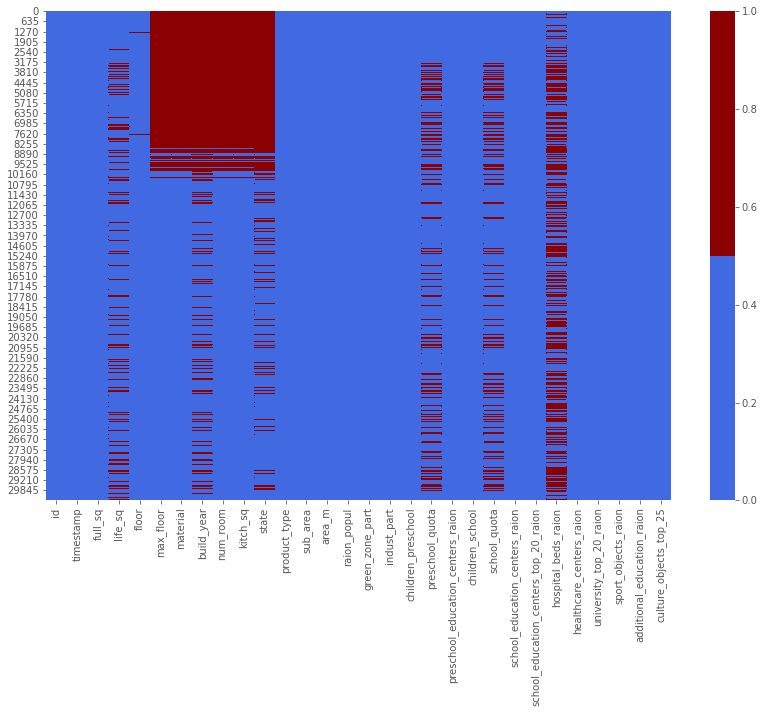

In [2]:
cols= df.columns[:30]
colores=['royalblue','darkred']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colores))



In [3]:
diccionario={}
for caracteristica in df.columns:
    faltantes = np.mean(df[caracteristica].isnull())
    diccionario[caracteristica]=round(faltantes*100)

Operator es un paquete que nos permite manipular, ordenar estructuras de datos

In [4]:
import operator
diccionario_orden = dict( sorted(diccionario.items(), key=operator.itemgetter(1),reverse=True))

for key in diccionario_orden:
    print(key+":"+str(diccionario_orden[key]))


hospital_beds_raion:47
build_year:45
state:44
cafe_sum_500_min_price_avg:44
cafe_sum_500_max_price_avg:44
cafe_avg_price_500:44
max_floor:31
material:31
num_room:31
kitch_sq:31
preschool_quota:22
school_quota:22
life_sq:21
cafe_sum_1000_min_price_avg:21
cafe_sum_1000_max_price_avg:21
cafe_avg_price_1000:21
raion_build_count_with_material_info:16
build_count_block:16
build_count_wood:16
build_count_frame:16
build_count_brick:16
build_count_monolith:16
build_count_panel:16
build_count_foam:16
build_count_slag:16
build_count_mix:16
raion_build_count_with_builddate_info:16
build_count_before_1920:16
build_count_1921-1945:16
build_count_1946-1970:16
build_count_1971-1995:16
build_count_after_1995:16
cafe_sum_1500_min_price_avg:14
cafe_sum_1500_max_price_avg:14
cafe_avg_price_1500:14
cafe_sum_2000_min_price_avg:6
cafe_sum_2000_max_price_avg:6
cafe_avg_price_2000:6
cafe_sum_3000_min_price_avg:3
cafe_sum_3000_max_price_avg:3
cafe_avg_price_3000:3
floor:1
prom_part_5000:1
cafe_sum_5000_min_pric

<AxesSubplot:xlabel='index'>

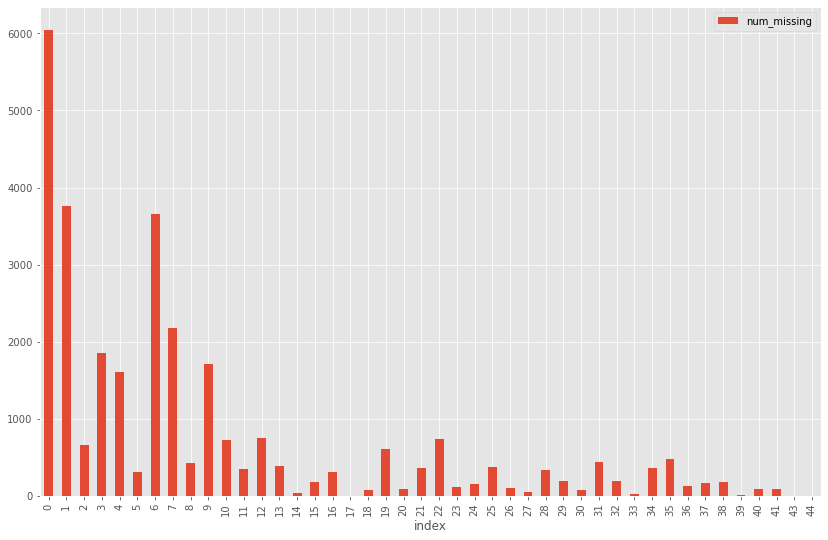

In [5]:
for col in df.columns:
    perdidos = df[col].isnull()
    num_missing = np.sum(perdidos)
    
    if num_missing > 0:
        #print('Generando un indicador para: {}'.format(col))
        df['{}_ismissing'.format(col)]= perdidos

        
#Basado en el feature, vamos a graficar el histograma de los datos perdidos

col_perdida= [caracteristica for caracteristica in df.columns if 'ismissing' in caracteristica]
df['num_missing'] = df[col_perdida].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')




### 3. Nos dimos cuentas que existían varias columnas que no tenían todos los datos


Les falta 1 o más datos

In [6]:
100*df[df['num_missing']>=1].shape[0]/df.shape[0]

80.17131042630697

Tienen todas las observaciones

In [7]:
100*df[df['num_missing']<1].shape[0]/df.shape[0]

19.82868957369302

##### ¿Qué hacer?

__No__ existe una solución acordada para enfrentar el problema de los datos vacíos. 

Lo mejor que puede hacer un  _data scientist_ es __estudiar__ la _característica específica_  el _conjunto de datos_ para __decidir__ la mejor manera de manejarlos.

Hay cuatro métodos comunes para manejar los datos faltantes, pero, si la situación es más complicada, debemos ser __creativos__ para utilizar métodos más sofisticados, como el __modelamiento__ de datos faltantes.



### 4. Los alumnos habían sugerido 2 métodos, el primero, eliminar la data, el segundo calcular el promedio.


----------------------------
----------------------------
----------------------------
## Limpieza

### Solución 1: Eliminar la observación (fila)


En __estadística__, este método se denomina __técnica de eliminación por lista__. En esta solución, descartamos toda la observación (fila) siempre que falte un valor (en una columna).

Este método debería aplicarse solo si estamos seguros de que los datos que faltan no son informativos. De lo contrario, deberíamos considerar otras soluciones.

Podría haber otros criterios a utilizar para descartar las observaciones.

Por ejemplo, cuando vimos el histograma de los datos faltantes, pusimos énfasis en que una cantidad pequeña de observaciones (filas) tiene más de 35 características (columnas) faltantes en total. Podemos crear un nuevo dataframe eliminando observaciones con __más de 35 características faltantes__. 

In [8]:
porcentaje_faltante=float("{:.2f}".format(100*df[df['num_missing']>35].shape[0]/df.shape[0]))
print(porcentaje_faltante)

2.27


In [9]:
indice_a_eliminar = df[df['num_missing'] > 35].index
df_filtrado = df.drop(indice_a_eliminar, axis=0)

In [10]:
print("Obs Original: " + str(df.shape[0]) + " | Obs después del filtro: " + str(df_filtrado.shape[0]))
print("Porcentaje filtrado: " + str(porcentaje_faltante)+"%")


Obs Original: 30471 | Obs después del filtro: 29779
Porcentaje filtrado: 2.27%


#### En la misma línea, podemos eliminar las características (columnas)

Al igual que en el paso anterior, esto solo se debe hacer cuando estamos seguros de que esta característica 
no va a proporcionar información útil.

Aquí podemos hacer uso de nuestros porcentajes por columna calculados anteriormente:
  
Por ejemplo, en la lista de % de datos faltantes, notamos que _hospital_beds_raion_ le falta el 47% de observaciones. 

In [11]:
key=next(iter(diccionario_orden))
print(key,diccionario_orden[key])

hospital_beds_raion 47


Eliminamos la columna

In [12]:
eliminar_col = [key]
df_sin_col = df.drop(eliminar_col, axis=1)

In [13]:
df_sin_col

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,1
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,False,0
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,False,False,False,False,False,False,False,False,False,21
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,False,0


## La imputación


Cuando la __característica__ (columna) es una __variable numérica__, podemos realizar la __imputación de datos faltantes__.  

Podemos reemplazar los valores faltantes con __el promedio__ o __la mediana__ de los datos de la misma característica.

Usando _life_sq_ como ejemplo, podemos reemplazar los valores faltantes de esta característica por su mediana. 

In [14]:
df['life_sq'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
30466    False
30467    False
30468     True
30469    False
30470    False
Name: life_sq, Length: 30471, dtype: bool

In [15]:
mediana = df['life_sq'].median()
print(mediana)
df['life_sq'] = df['life_sq'].fillna(mediana)

30.0


Podriamos aplicar lo mismo pero a todas las columnas númericas

In [16]:
df_numericas = df.select_dtypes(include=[np.number])
cols_numericas = df_numericas.columns.values

for col in cols_numericas:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # Hacer la imputación solo para las columnas que tienen valores NaN.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

Cuando la __característica__ (columna) es una __variable categórica__, podemos __imputar__ los datos faltantes agregando la __moda__ (el valor más frecuente) a los __NaN__.



In [17]:
df_no_numerico = df.select_dtypes(exclude=[np.number])
cols_no_numericas = df_no_numerico.columns.values

for col in cols_no_numericas:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # Solo para las columnas categoricas que tienen datos vacíos.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # imputar con el valor más frecuente.
        df[col] = df[col].fillna(top)



El dataset no tiene variables categoricas vacías por lo que no hay resultados

----------------
----------------

# Limpieza de datos profunda

Para reforzar el aprendizaje de la limpieza de datos utilizaremos varios conjuntos de datos y aplicaremos una bateria completa de mecanismos de data-cleaning.

Comenzaremos con dos conjuntos:
1. El conjunto __NLSY97__
2. El conjunto __COVID-19__ de ourworld in data




### 1. El conjunto NLSY97

El conjunto NLSY97 consiste en una muestra representativa de Estados Unidos de 8,984 hombres y mujeres nacidos durante los años 1980 a 1984, que vivían en los Estados Unidos en el momento de la encuesta en 1997. 
  
Los participantes tenían entre 12 y 16 años al 31 de diciembre de 1996.  Se llevaron a cabo entrevistas anualmente desde 1997 hasta 2011 y cada dos años desde entonces. La cohorte en curso ha sido encuestada 18 veces hasta la fecha. Los datos están disponibles desde la Ronda 1 (1997-98) hasta la Ronda 18 (2017-18).

El NLSY97 recopila una amplia información sobre el comportamiento del mercado laboral y las experiencias educativas de los encuestados. La encuesta también incluye datos sobre los antecedentes familiares y comunitarios de los jóvenes para ayudar a los investigadores a evaluar el impacto de la escolarización y otros factores ambientales en estos participantes en el mercado laboral. Los datos del NLSY97 también ayudan a determinar cómo las experiencias de los jóvenes se relacionan con el establecimiento de carreras, la participación en programas gubernamentales y la formación de familias. 
  
Finalmente, la información del NLSY97 permite a los investigadores comparar el progreso de esta cohorte con el de otras cohortes NLS (Ver Armonización de datos entre cohortes NLSY79 / 97).
  
  
  
  
  
Fuente:[U.S. BUREAU OF LABOR STATISTICS](https://www.bls.gov/nls/nlsy97.htm) 


### 2.  Our World in Data COVID-19

Perfiles de países de coronavirus

Se crearon 207 perfiles de países que permiten explorar las estadísticas sobre la pandemia de coronavirus para todos los países del mundo.

En una pandemia de rápida evolución, no es una cuestión sencilla identificar los países que tienen más éxito en hacer progresos contra ella. Para una evaluación integral, se ha rastreado el impacto de la pandemia en una [publicación](https://ourworldindata.org/coronavirus#citation) y se crearon perfiles de países para 207 países para estudiar en profundidad las estadísticas sobre la pandemia de coronavirus en todos los países del mundo.

Cada perfil incluye visualizaciones interactivas, explicaciones de las métricas presentadas y los detalles sobre las fuentes de los datos.

El perfil de cada país se actualiza __a diario__.







Fuente: [Our World in Data](https://ourworldindata.org/coronavirus)


## Comenzamos con el código

Como siempre importamos nuestros paquétes por default

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Seleccionaremos un conjunto de datos (toy dataset) que tiene valores NaN agregados

In [19]:
covidtotals = pd.read_csv("data/covidnan.csv")
#miramos nuestros datos
covidtotals.head()


,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


In [20]:
#seteamos ISO_CODE como índice
covidtotals.set_index("iso_code", inplace=True)
covidtotals.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


Vemos que hay datos demográficos (como población) y acumulados como (total_deaths_pm) 

In [21]:
# Generamos arreglos con nuestras respectivas columnas totales y demograficas
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']



### revisaremos las columnas demográficas para ver si faltan datos

In [22]:

covidtotals[demovars].isnull().sum(axis=0)

population         0
pop_density       12
median_age        24
gdp_per_capita    28
hosp_beds         46
dtype: int64

In [23]:
demovarsmisscnt = covidtotals[demovars].isnull().sum(axis=1)
demovarsmisscnt.value_counts()


0    156
1     24
2     12
3     10
4      8
dtype: int64

#### Listaremos los 5 primeros países con mas de 3 NaN en las columnas

In [24]:
covidtotals.loc[demovarsmisscnt>=3, ['location'] + demovars].head(5).T


iso_code,AND,AIA,BES,VGB,FRO
location,Andorra,Anguilla,Bonaire Sint Eustatius and Saba,British Virgin Islands,Faeroe Islands
population,77265.0,15002.0,26221.0,30237.0,48865.0
pop_density,163.755,NaN,NaN,207.973,35.308
median_age,NaN,NaN,NaN,NaN,NaN
gdp_per_capita,NaN,NaN,NaN,NaN,NaN
hosp_beds,NaN,NaN,NaN,NaN,NaN


In [25]:
type(demovarsmisscnt)

pandas.core.series.Series

### comprobaremos si faltan las columnas acumulativas

In [26]:

covidtotals[totvars].isnull().sum(axis=0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     1
total_deaths_pm    1
dtype: int64

In [27]:
totvarsmisscnt = covidtotals[totvars].isnull().sum(axis=1)
totvarsmisscnt.value_counts()


0    209
2      1
dtype: int64

In [28]:
covidtotals.loc[totvarsmisscnt>0].T

iso_code,HKG
lastdate,2020-05-26
location,Hong Kong
total_cases,0
total_deaths,0
total_cases_pm,NaN
total_deaths_pm,NaN
population,7496988.0
pop_density,7039.714
median_age,44.8
gdp_per_capita,56054.92


### Utilizaremos el método `fillna()` para corregir los datos

In [29]:
covidtotals.total_cases_pm.fillna(covidtotals.total_cases/(covidtotals.population/1000000), inplace=True)


In [30]:
covidtotals.total_deaths_pm.fillna(covidtotals.total_deaths/(covidtotals.population/1000000), inplace=True)
covidtotals[totvars].isnull().sum(axis=0)

location           0
total_cases        0
total_deaths       0
total_cases_pm     0
total_deaths_pm    0
dtype: int64

# Buscando Outliers

La traducción de outliers es _valores atípicos_, me gusta más _outlier_, 

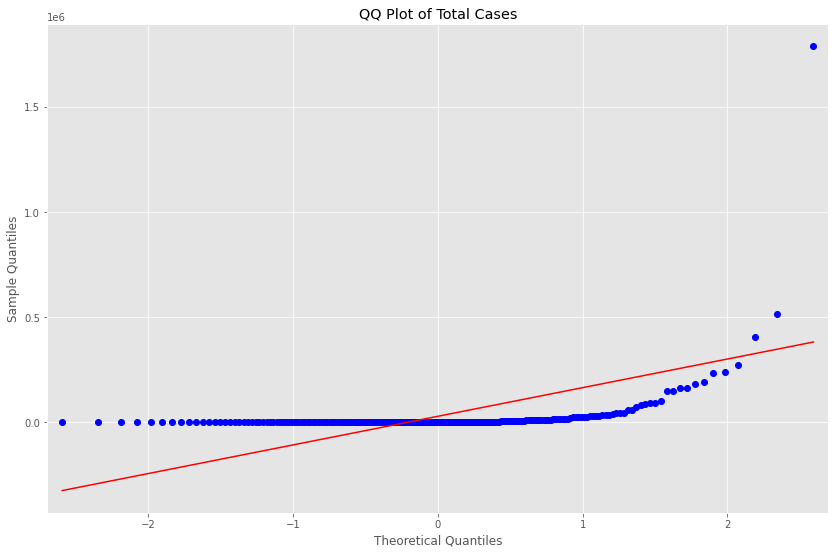

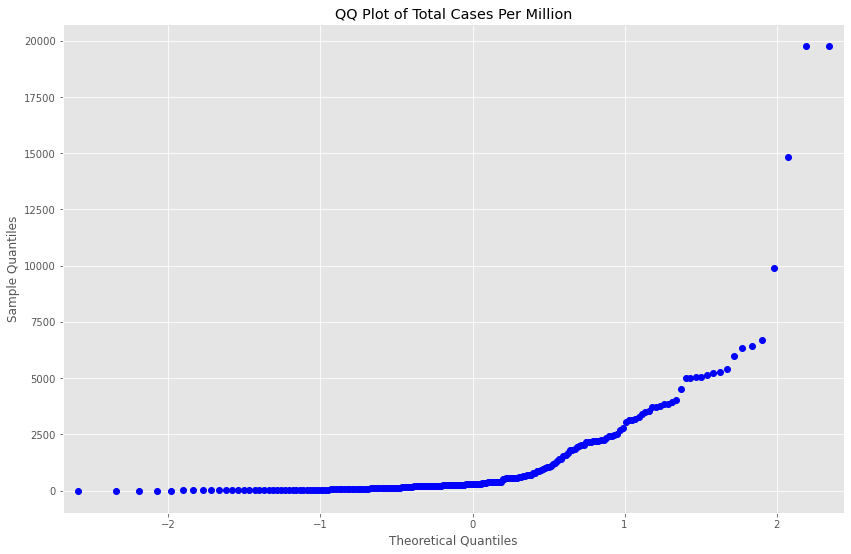

-14736.125 <--> 25028.875


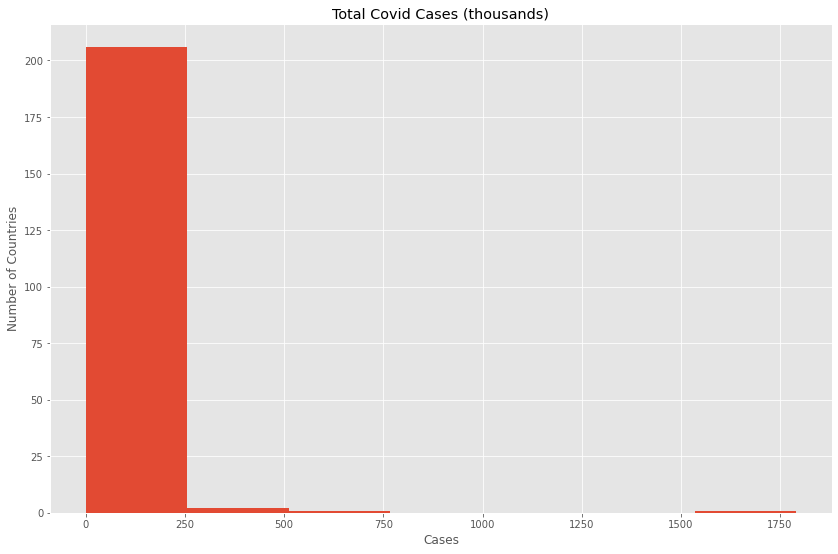

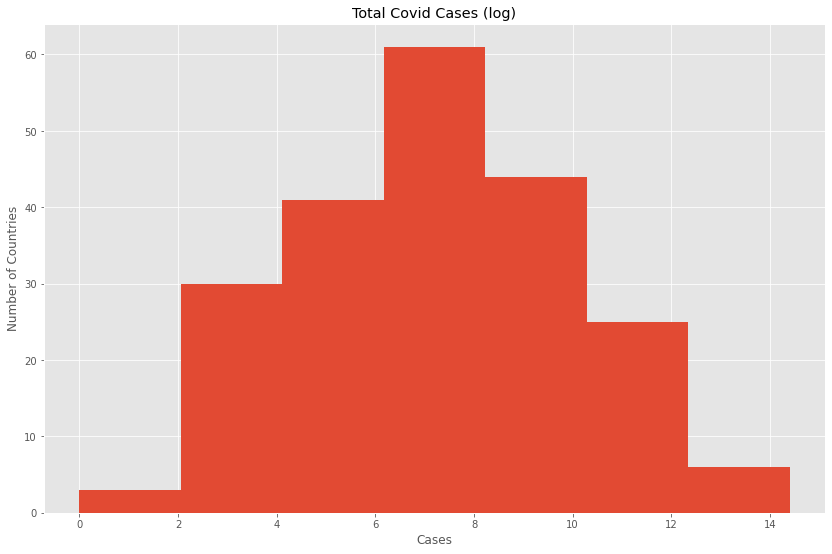

In [38]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.0f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# set up the cumulative and demographic columns
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']

# get descriptive statistics on the cumulative values
covidtotalsonly = covidtotals.loc[:, totvars]
covidtotalsonly.describe()
pd.options.display.float_format = '{:,.2f}'.format
covidtotalsonly.quantile(np.arange(0.0, 1.1, 0.1))
covidtotalsonly.skew()
covidtotalsonly.kurtosis()

# test for normality
def testnorm(var, df):
  stat, p = scistat.shapiro(df[var])
  return p

testnorm("total_cases", covidtotalsonly)
testnorm("total_deaths", covidtotalsonly)
testnorm("total_cases_pm", covidtotalsonly)
testnorm("total_deaths_pm", covidtotalsonly)

# show a qqplot for total cases and total cases per million
sm.qqplot(covidtotalsonly[['total_cases']]. \
  sort_values(['total_cases']), line='s')
plt.title("QQ Plot of Total Cases")

sm.qqplot(covidtotals[['total_cases_pm']]. \
  sort_values(['total_cases_pm']), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.show()

# show outliers for total cases
thirdq, firstq = covidtotalsonly.total_cases.quantile(0.75), covidtotalsonly.total_cases.quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
outlierhigh, outlierlow = interquartilerange+thirdq, firstq-interquartilerange
print(outlierlow, outlierhigh, sep=" <--> ")

# generate a table of outliers and save it to Excel
def getoutliers():
  dfout = pd.DataFrame(columns=covidtotals.columns, data=None)
  for col in covidtotalsonly.columns[1:]:
    thirdq, firstq = covidtotalsonly[col].quantile(0.75),\
      covidtotalsonly[col].quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    outlierhigh, outlierlow = interquartilerange+thirdq,\
      firstq-interquartilerange
    df = covidtotals.loc[(covidtotals[col]>outlierhigh) | \
      (covidtotals[col]<outlierlow)]
    df = df.assign(varname = col, threshlow = outlierlow,\
       threshhigh = outlierhigh)
    dfout = pd.concat([dfout, df])
  return dfout

outliers = getoutliers()
outliers.varname.value_counts()
outliers.to_excel("views/outlierscases.xlsx")

# look a little more closely at outliers for cases per million
outliers.loc[outliers.varname=="total_cases_pm",\
  ['location','total_cases_pm','pop_density','gdp_per_capita']].\
  sort_values(['total_cases_pm'], ascending=False)

covidtotals[['pop_density','gdp_per_capita']].quantile([0.25,0.5,0.75])

# show the total cases histogram again
plt.hist(covidtotalsonly['total_cases']/1000, bins=7)
plt.title("Total Covid Cases (thousands)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

# do a log transformation of the covid data
covidlogs = covidtotalsonly.copy()
for col in covidtotalsonly.columns[1:]:
  covidlogs[col] = np.log1p(covidlogs[col])

plt.hist(covidlogs['total_cases'], bins=7)
plt.title("Total Covid Cases (log)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

----------------
----------------

### Manipulando data from scratch

###### Realizaremos [webscraping](https://es.wikipedia.org/wiki/Web_scraping)

Vamos a realizar un [_toy problem_](https://en.wikipedia.org/wiki/Toy_problem), descargaremos los datos desde esta [página](http://www.alrb.org/datacleaning/covidcaseoutliers.html). 



Lo primero que tenemos que saber es sobre algunos formatos de datos como [JSON](https://es.wikipedia.org/wiki/JSON) y la mejora de documentos con Pretty Printer.

  ```python
        import json
  ```
    
Links: 

1. Especificaciones del formato [JSON](http://www.json.org/json-es.html).
2. Paquete [JSON python](https://docs.python.org/3/library/json.html).  
  
  
Utilizaremos [pprint](https://docs.python.org/3/library/pprint.html):
  
  ```python
        import pprint
  ```

Además utilizaremos [requests](https://docs.python-requests.org/en/latest/) para traernos la página web:
  
  ```python
        import requests
  ```

y para extraer la información desde el contenido web utilizaremos [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/). Analiza gramaticalmente HTML o XML, proporcionando _modismos Pythonicos_ para iterar, buscar y modificar el árbol de [_parseo_](https://es.wikipedia.org/wiki/Analizador_sint%C3%A1ctico).

  
  ```python
        from bs4 import BeautifulSoup
  ```




In [31]:
import json
import pprint
import requests
from bs4 import BeautifulSoup as sopa

#### Parsearemos la página web y obtendremos las cabeceras de la tabla

In [32]:

web= requests.get("http://www.alrb.org/datacleaning/covidcaseoutliers.html")
bs = sopa(web.text, 'html.parser')
cabeceras = bs.find('table', {'id':'tblDeaths'}).thead.find_all('th')
type(cabeceras)
labelcols = [j.get_text() for j in cabeceras]
labelcols[0] = "Columns"
labelcols

['Columns',
 'Cases',
 'Deaths',
 'Cases per Million',
 'Deaths per Million',
 'population',
 'population_density',
 'median_age',
 'gdp_per_capita',
 'hospital_beds_per_100k']

#### Sacaremos los datos de la tabla

In [33]:
filas = bs.find('table', {'id':'tblDeaths'}).tbody.find_all('tr')
dato_filas = []
label_filas = []
for fila in filas:
    filalabels = fila.find('th').get_text()
    celdas = fila.find_all('td', {'class':'data'})
    if (len(filalabels)>3):
        label_filas.append(filalabels)
    if (len(celdas)>0):
        valor_de_celda = [j.get_text() for j in celdas]
        dato_filas.append(valor_de_celda)


#### Embellecemos el output

In [34]:
pprint.pprint(dato_filas[0:2])
pprint.pprint(label_filas[0:2])

for i in range(len(dato_filas)):
    dato_filas[i].insert(0, label_filas[i])

pprint.pprint(dato_filas[0:2])



[['9,394', '653', '214', '15', '43,851,043', '17', '29', '13,914', '1.9'],
 ['16,642', '668', '1848', '74', '9,006,400', '107', '44', '45,437', '7.4']]
['Algeria', 'Austria']
[['Algeria',
  '9,394',
  '653',
  '214',
  '15',
  '43,851,043',
  '17',
  '29',
  '13,914',
  '1.9'],
 ['Austria',
  '16,642',
  '668',
  '1848',
  '74',
  '9,006,400',
  '107',
  '44',
  '45,437',
  '7.4']]



#### Pasando la data de la página a pandas


In [35]:
totaldeaths = pd.DataFrame(dato_filas, columns=labelcols)
totaldeaths.iloc[:,1:5].head()
totaldeaths.dtypes
totaldeaths.columns = totaldeaths.columns.str.replace(" ", "_").str.lower()

for col in totaldeaths.columns[1:-1]:
    totaldeaths[col] = totaldeaths[col].str.replace("[^0-9]","").astype('int64')

totaldeaths['hospital_beds_per_100k'] = totaldeaths['hospital_beds_per_100k'].astype('float')

totaldeaths.dtypes

<ipython-input-35-3488f1531786>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  totaldeaths[col] = totaldeaths[col].str.replace("[^0-9]","").astype('int64')


columns                    object
cases                       int64
deaths                      int64
cases_per_million           int64
deaths_per_million          int64
population                  int64
population_density          int64
median_age                  int64
gdp_per_capita              int64
hospital_beds_per_100k    float64
dtype: object

In [36]:
totaldeaths.head()

,columns,cases,deaths,cases_per_million,deaths_per_million,population,population_density,median_age,gdp_per_capita,hospital_beds_per_100k
0,Algeria,9394,653,214,15,43851043,17,29,13914,1.9
1,Austria,16642,668,1848,74,9006400,107,44,45437,7.4
2,Bangladesh,47153,650,286,4,164689383,1265,28,3524,0.8
3,Belgium,58381,9467,5037,817,11589616,376,42,42659,5.6
4,Brazil,514849,29314,2422,138,212559409,25,34,14103,2.2
